## **Ex.1 - Loading the dataset**

In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

Splitting the data into 70% training and 30% test subsets.

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [4]:
print(f"Samples: {len(X)}, Number of features: {X.shape[1]}")

Samples: 178, Number of features: 13


In [13]:
np.unique(y)

array([1, 2, 3])

Standardizing the data.

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## **Ex.2 - Principal component analysis in scikit-learn**

### Part 1 - *Perform PCA and present the explained variance ratio* (check https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Perform the transformation on test data and plot the first two principal components.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_train)
principal_df = pd.DataFrame(data=principal_components, columns=["PC_1", "PC_2", "PC_3",
                                                                "PC_4", "PC_5"])
principal_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5
0,-204.920105,-3.443518,-0.342527,0.779685,-2.544203
1,480.687988,24.330171,0.896074,-1.329780,-0.129057
2,530.110841,-7.416111,5.233479,-1.517959,0.730806
3,340.316339,4.805879,0.373374,-1.722945,-0.498207
4,-59.897329,-4.035593,-0.966466,2.768124,-0.532074


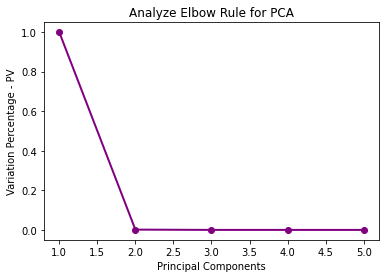

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_elbow_rule():
    PC_values = np.arange(pca.n_components_) + 1
    plt.plot(PC_values, pca.explained_variance_ratio_, "bo-", linewidth=2, color="purple")
    plt.title("Analyze Elbow Rule for PCA")
    plt.xlabel("Principal Components")
    plt.ylabel("Variation Percentage - PV")
    plt.show()

plot_elbow_rule()

In [33]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

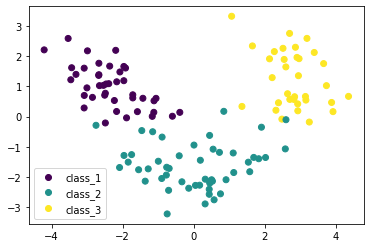

In [16]:
plot = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels=["class_1", "class_2", "class_3"])
plt.show()

### Part 2 - *Training logistic regression classifier using the first 2 principal components*. Using a cross-validation procedure (check https://scikit-learn.org/stable/modules/cross_validation.html), select the best C parameter for the logistic regression with the first two principal components. Repeat the same procedure for the dataset with all the original features. Compare the results in terms of accuracy and confusion matrix. Present the conclusions.

**Using the dataset that had the dimensional reduction applied.**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

param_dist = {"C": [1.0, 5.0, 10.0, 50.0, 150.0, 200.0, 500.0, 1000.0]}
lgr_model = LogisticRegression()
lgr_grid = GridSearchCV(estimator=lgr_model, param_grid=param_dist, cv=10, n_jobs=3)
lgr_grid.fit(X_train_pca, y_train)
print("Best Parameters using grid search")
print(lgr_grid.best_params_)

Best Parameters using grid search
{'C': 1.0}


In [27]:
lgr_model = LogisticRegression(C=1.0)

results = cross_validate(lgr_model, X_train_pca, y_train, cv=10, scoring=["accuracy"], return_train_score=True, return_estimator=True)

print(f'Accuracy - train: {results["train_accuracy"].mean()}, | Validation: {results["test_accuracy"].mean()}')

Accuracy - train: 0.9838722651222651, | Validation: 0.9839743589743589


In [29]:
results

{'fit_time': array([0.01441908, 0.0085454 , 0.00892663, 0.0065856 , 0.00627708,
        0.00587463, 0.00729632, 0.00841069, 0.0065558 , 0.00620079]),
 'score_time': array([0.00052094, 0.00078511, 0.00057983, 0.00051618, 0.00045538,
        0.00048542, 0.0004642 , 0.00053144, 0.00050497, 0.00046921]),
 'estimator': [LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression()],
 'test_accuracy': array([1.        , 1.        , 0.92307692, 1.        , 1.        ,
        0.91666667, 1.        , 1.        , 1.        , 1.        ]),
 'train_accuracy': array([0.98198198, 0.98198198, 0.99099099, 0.98198198, 0.98214286,
        0.99107143, 0.98214286, 0.98214286, 0.98214286, 0.98214286])}

In [37]:
from sklearn.metrics import accuracy_score
pred = results["estimator"][0].predict(X_test_pca)
print(f"Test acc: {round(accuracy_score(y_test, pred)*100, 2)}%")

Test acc: 92.59%


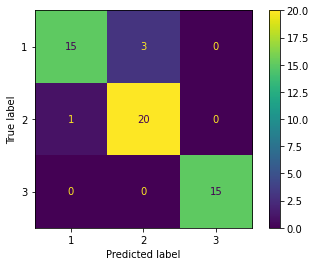

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred, labels=results["estimator"][0].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=results["estimator"][0].classes_,)
disp.plot()

plt.show()

**Using the dataset that not had the dimensional reduction applied.**

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings(action="ignore")

param_dist = {"C": [1.0, 5.0, 10.0, 50.0, 150.0, 200.0, 500.0, 1000.0]}
lgr_model = LogisticRegression(random_state=42)
lgr_grid = GridSearchCV(estimator=lgr_model, param_grid=param_dist, cv=10, n_jobs=3)
lgr_grid.fit(X_train, y_train)
print("Best Parameters using grid search")
print(lgr_grid.best_params_)

Best Parameters using grid search
{'C': 1000.0}


In [68]:
lgr_model = LogisticRegression(C=1.0)

results = cross_validate(lgr_model, X_train, y_train, cv=10, scoring=["accuracy"], return_train_score=True, return_estimator=True)

print(f'Accuracy - train: {results["train_accuracy"].mean()}, | Validation: {results["test_accuracy"].mean()}')

Accuracy - train: 0.9704231016731016, | Validation: 0.9346153846153845


In [69]:
results

{'fit_time': array([0.06153107, 0.07877612, 0.05494118, 0.02936268, 0.04194236,
        0.03603721, 0.02964401, 0.03336787, 0.03079128, 0.0306251 ]),
 'score_time': array([0.00076079, 0.0007062 , 0.00051808, 0.00052166, 0.00066757,
        0.00058389, 0.00051069, 0.00095153, 0.00051117, 0.00049615]),
 'estimator': [LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression()],
 'test_accuracy': array([1.        , 1.        , 0.84615385, 1.        , 0.91666667,
        0.83333333, 0.83333333, 1.        , 1.        , 0.91666667]),
 'train_accuracy': array([0.97297297, 0.96396396, 0.97297297, 0.96396396, 0.97321429,
        0.98214286, 0.96428571, 0.97321429, 0.96428571, 0.97321429])}

In [70]:
from sklearn.metrics import accuracy_score
pred = results["estimator"][0].predict(X_test)
print(f"Test acc: {round(accuracy_score(y_test, pred)*100, 2)}%")

Test acc: 96.3%


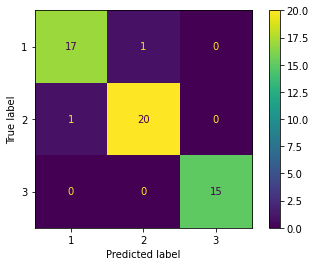

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred, labels=results["estimator"][0].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=results["estimator"][0].classes_,)
disp.plot()

plt.show()

**In other words, if you use the original features, basically the model got a better generalization of applied PCA, because the features of the dataset has a strong correlation and causality with the targets, in summary this make the decision boundary more confident.**


**But if you look in the cross validation approach, the model used as pca input features has a better generalization compared with original features**